# Case study on Unsupervised Learning
Do the following in the wine dataset.
1. Read the dataset to the python environment.
2. Try out different clustering models in the wine dataset.
3. Find the optimum number of clusters in each model and create the model with
   the optimum number of clusters.

# 1.Read the dataset to the python environment.

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

wine=pd.read_csv("wine.csv")

In [2]:
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine.shape

(178, 13)

# checking for null Values

In [4]:
wine.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# checking for outliers.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, 'Alcohol'),
  Text(2, 0, 'Malic_Acid'),
  Text(3, 0, 'Ash'),
  Text(4, 0, 'Ash_Alcanity'),
  Text(5, 0, 'Magnesium'),
  Text(6, 0, 'Total_Phenols'),
  Text(7, 0, 'Flavanoids'),
  Text(8, 0, 'Nonflavanoid_Phenols'),
  Text(9, 0, 'Proanthocyanins'),
  Text(10, 0, 'Color_Intensity'),
  Text(11, 0, 'Hue'),
  Text(12, 0, 'OD280'),
  Text(13, 0, 'Proline')])

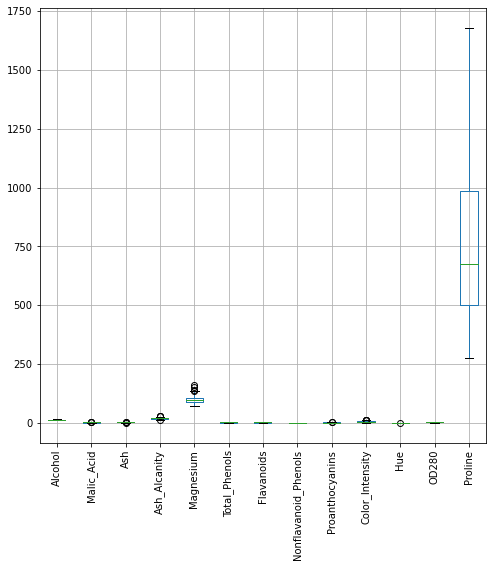

In [6]:
plt.figure(figsize=(8, 8))
wine.boxplot()
plt.xticks(rotation=90) 

# Cleaning the outliers

In [11]:
for i in wine:
    Q1 = np.percentile(wine[i],25,interpolation='midpoint')
    Q2 = np.percentile(wine[i],50,interpolation='midpoint')
    Q3 = np.percentile(wine[i],75,interpolation='midpoint')
    IQR = Q3 - Q1
    low_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    out = pd.DataFrame()
    out['outlier'] = wine[(wine[i]<low_limit) | (wine[i]>upper_limit)][i]
    ind1= (wine[i]<low_limit) | (wine[i]>upper_limit)

    wine.drop(wine.loc[ind1].index,inplace=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, 'Alcohol'),
  Text(2, 0, 'Malic_Acid'),
  Text(3, 0, 'Ash'),
  Text(4, 0, 'Ash_Alcanity'),
  Text(5, 0, 'Magnesium'),
  Text(6, 0, 'Total_Phenols'),
  Text(7, 0, 'Flavanoids'),
  Text(8, 0, 'Nonflavanoid_Phenols'),
  Text(9, 0, 'Proanthocyanins'),
  Text(10, 0, 'Color_Intensity'),
  Text(11, 0, 'Hue'),
  Text(12, 0, 'OD280'),
  Text(13, 0, 'Proline')])

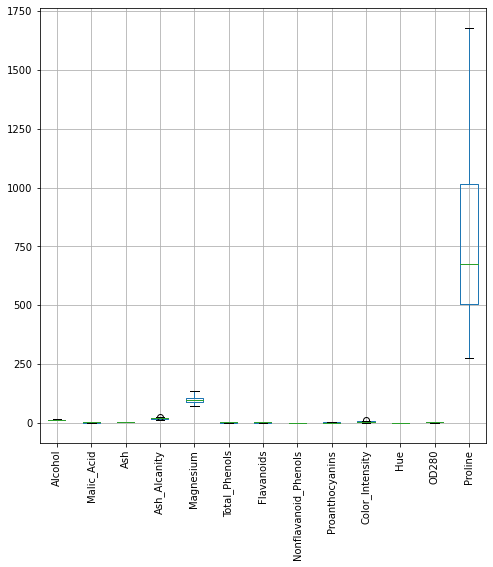

In [12]:
plt.figure(figsize=(8, 8))
wine.boxplot()
plt.xticks(rotation=90) 

# 2.Try out different clustering models in the wine dataset.

## a.Kmeans

In [13]:
from sklearn.cluster import KMeans
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(wine)
labels=model_kmeans.predict(wine)
print(labels)

[0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 2 2
 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 2 1 2 2 1 1 2 1 1 1 1 2 2 1 1
 1 1 1 2 2 1 1 1 1 1 2 1 2 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1
 2 1 1 2 2 2 2 1 2 2 2 1 1 2 2 1 2 2 1 1 1 2 2 2 1 1 2 1 2 2 1 2 2 2 1 1 2
 2 2 2 1]


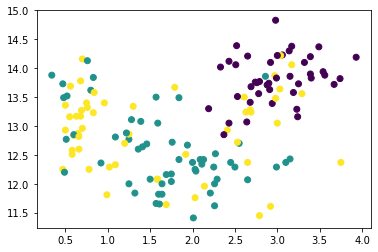

In [14]:
import matplotlib.pyplot as plt
tp=wine['Alcohol']
pr=wine['Flavanoids']
plt.scatter(pr,tp,c=labels)

In [16]:
sample=[[1,3.4,5.6,23,44,7.7,8.9,4,5.6,7.8,2.3,.23,23]]
new_labels=model_kmeans.predict(sample)
print(new_labels)

[1]


In [17]:
ks = range(1,10)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(wine)
    inertia.append(model.inertia_)

F:\anna\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


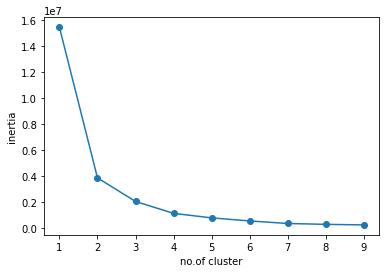

In [18]:
plt.plot(ks,inertia,marker='o')
plt.xlabel('no.of cluster')
plt.ylabel('inertia')
plt.show()

It is seen that the value of k decreases from 3 in the elbow method.so number of clusters is taken as 3.

## b.Agglomerative hierarchical clustering

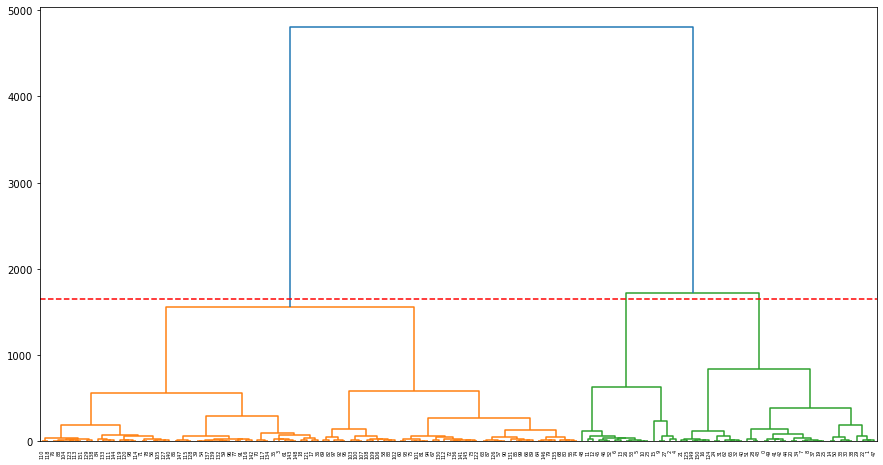

In [19]:
from scipy.cluster.hierarchy import dendrogram,linkage
import matplotlib.pyplot as plt
linked=linkage(wine,method="ward")
plt.figure(figsize=(15,8))
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.hlines(1650,0,5000,color='r',linestyle='dashed')
plt.show()

we have taken number of clusters as 3 from this method.

In [20]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
labels=cluster.fit_predict(wine)
labels

array([1, 1, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 0, 0, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

# After Scaling and Normalisation 

In [21]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(scalar,model_kmeans)
pipe.fit(wine)
labels_1=pipe.predict(wine)
print(labels_1)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [22]:
# normaliser
from sklearn.preprocessing import Normalizer
norm=Normalizer()
pipe1=make_pipeline(scalar,model_kmeans)
pipe1.fit(wine)
labels_2=pipe1.predict(wine)
print(labels_2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [23]:
from sklearn.cluster import KMeans
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(wine)
labels=model_kmeans.predict(wine)
print(labels)

[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 0 2 0 0 2 2 0 2 2 2 2 0 0 2 2
 2 2 2 0 0 2 2 2 2 2 0 2 0 2 2 2 2 0 2 2 2 2 0 2 0 2 2 2 2 2 2 0 2 2 2 2 2
 0 2 2 0 0 0 0 2 0 0 0 2 2 0 0 2 0 0 2 2 2 0 0 0 2 2 0 2 0 0 2 0 0 0 2 2 0
 0 0 0 2]


In [24]:
ks = range(1,10)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(wine)
    inertia.append(model.inertia_)

F:\anna\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


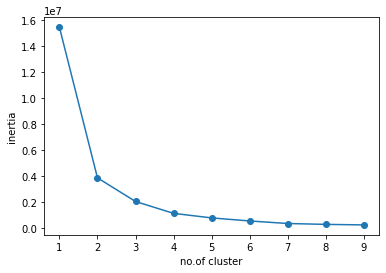

In [25]:
plt.plot(ks,inertia,marker='o')
plt.xlabel('no.of cluster')
plt.ylabel('inertia')
plt.show()

In [26]:
sample=[[1,3.4,5.6,23,44,7.7,8.9,4,5.6,7.8,2.3,.23,23]]
new_labels=model_kmeans.predict(sample)
print(new_labels)

[2]


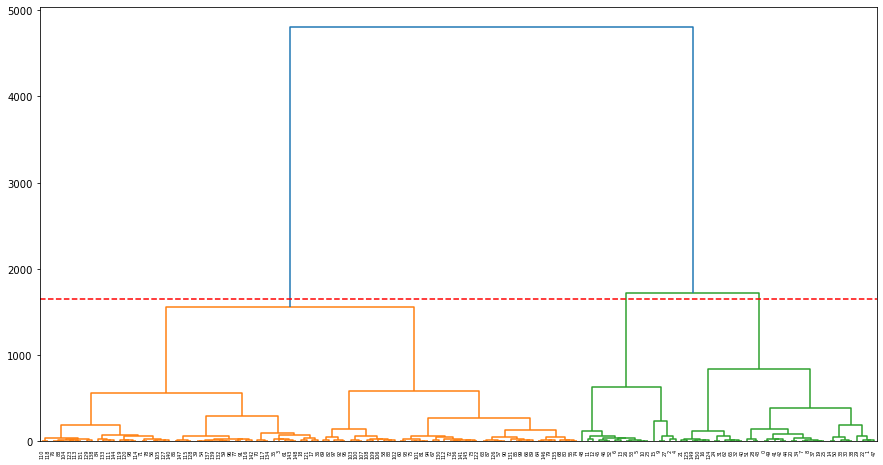

In [27]:
from scipy.cluster.hierarchy import dendrogram,linkage
import matplotlib.pyplot as plt
linked=linkage(wine,method="ward")
plt.figure(figsize=(15,8))
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.hlines(1650,0,5000,color='r',linestyle='dashed')
plt.show()

In [29]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
labels=cluster.fit_predict(wine)
labels

array([1, 1, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 0, 0, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [30]:
from sklearn.metrics import silhouette_score

In [31]:
silhouette_score(wine,labels)

0.597258598946891

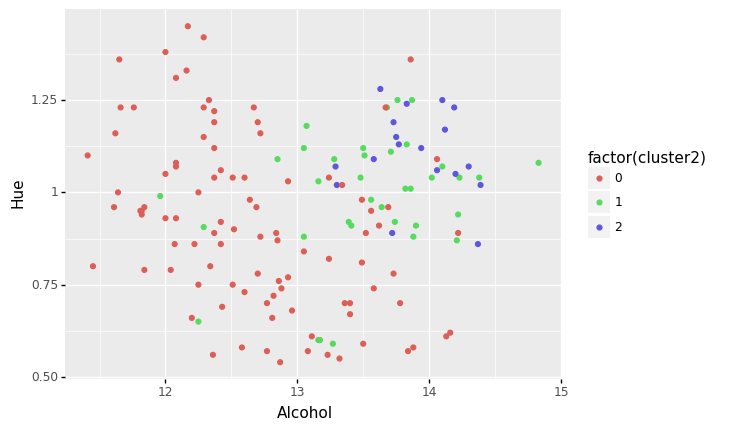

<ggplot: (144733120253)>

In [32]:
from plotnine import *
wine['cluster2']=labels
(ggplot(wine, aes( x ='Alcohol', y = 'Hue',colour='factor(cluster2)'))+geom_point())